In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

### Udacity Engagement Dataset
__Engagement__ roughly follows exponential distribution.

In [2]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

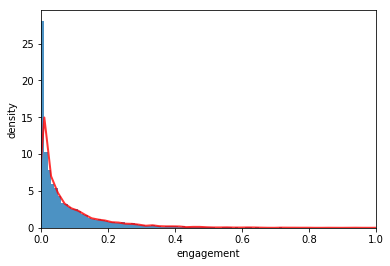

In [3]:
engagement = np.loadtxt('data/engagement.csv')

plt.hist(engagement, bins=100, alpha=0.8, density=True)

x_grid = np.linspace(-1, 1, 100)
pdf_engagement = kde_sklearn(engagement, x_grid, bandwidth=0.007)

plt.plot(x_grid, pdf_engagement, alpha=0.8, lw=2, color='r')

plt.xlabel("engagement")
plt.ylabel("density")

plt.xlim(0, 1)

plt.savefig('outputs/engagement.png')
plt.show()

In [4]:
mean = np.mean(engagement)
std = np.std(engagement)

print("""
Population mean: %.5f
Population std: %.5f
Population size: %i
"""%(mean, std, len(engagement)))


Population mean: 0.07727
Population std: 0.10721
Population size: 8702



### Examine Sampling distribution

In [5]:
sample_size = 300
n_trials = 1000000

# draw one million samples, each of size 300
samples = np.array([np.random.choice(engagement, sample_size) 
                    for _ in range(n_trials)])

In [6]:
samples.shape

(1000000, 300)

In [7]:
# calculate sample mean for each sample
means = samples.mean(axis=1)

# mean of sampling distribution
sample_mean = np.mean(means)

# empirical standard error
sample_std = np.std(means)

analytical_std = std / np.sqrt(sample_size)

print("""
sampling distribution mean: %.5f
sampling distribution std: %.5f
analytical std: %.5f
"""%(sample_mean, sample_std, analytical_std))


sampling distribution mean: 0.07727
sampling distribution std: 0.00619
analytical std: 0.00619



__Sampling distribution__ looks very normal.

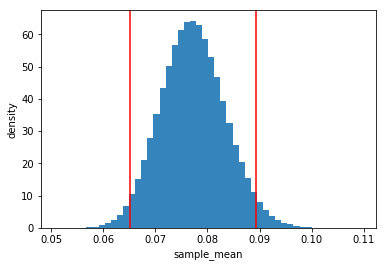

In [8]:
from scipy.stats import t
from scipy.special import erfinv

# sampling distribution
z = 1.96
plt.hist(means, bins=50, alpha=0.9, density=True)
plt.axvline(sample_mean - 1.96 * sample_std, color='r')
plt.axvline(sample_mean + 1.96 * sample_std, color='r')

plt.xlabel('sample_mean')
plt.ylabel('density')

plt.savefig('outputs/sampling_dist.png', transparent=False)
plt.show()

__Sampping distirbution__ is slightly skewed to the positive side.

In [9]:
print("lower tail: %.2f%%"%(100 * sum(means < sample_mean - 1.96 * sample_std) / len(means)))

lower tail: 2.05%


In [10]:
print("upper tail: %.2f%%"%(100 * sum(means > sample_mean + 1.96 * sample_std) / len(means)))

upper tail: 2.91%


__QQ plot__ confirms tendency toward normal distribution.

In [11]:
import pylab 
import scipy.stats as stats

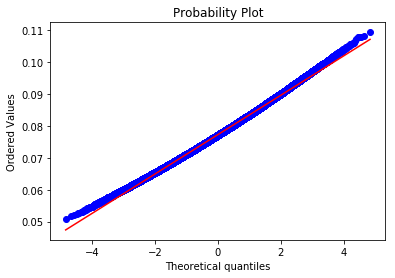

In [12]:
stats.probplot(means, dist="norm", plot=pylab)
pylab.savefig('outputs/qq_plot.png')
pylab.show()

### Confidence Interval
We get 0.05 false positive rate, under the 95% confidence interval

In [13]:
# make 95% confidence interval
z = 1.96

In [14]:
se = samples.std(axis=1) / np.sqrt(sample_size)
ups = means + z * se
los = means - z * se
success = np.mean((mean >= los) & (mean <= ups))
fpr = np.mean((mean < los) | (mean > ups))
print("False positive rate: %.3f"%fpr)

False positive rate: 0.056


In [15]:
# success = 0
# los = []
# ups = []
# for i, sample in enumerate(samples):
#     x = np.mean(sample)
#     s = np.std(sample)
#     up = x + z * s / np.sqrt(sample_size)
#     lo = x - z * s / np.sqrt(sample_size)
#     los.append(lo)
#     ups.append(up)
#     if lo <= mean and mean <= up:
#         success += 1
#     if i % 100 == 0:
#         print("Progress %.2f%%..."%
#               (100 * (i + 1) / len(samples)), end='\r')
# print("False positive rate: %.3f"%(1 - success / len(samples)))

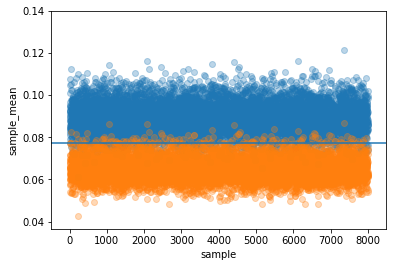

In [16]:
n_points = 8000

# plt.figure(figsize=(14, 6))
plt.scatter(list(range(len(ups[:n_points]))), ups[:n_points], alpha=0.3)
plt.scatter(list(range(len(los[:n_points]))), los[:n_points], alpha=0.3)
plt.axhline(y=0.07727)

plt.xlabel("sample")
plt.ylabel("sample_mean")
plt.savefig("outputs/ci.png", transparent=False)